<a href="https://www.kaggle.com/code/adityaramachandran27/india-international-air-traffic-full-eda?scriptVersionId=136168502" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-air-traffic-from-and-to-india/Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv
/kaggle/input/international-air-traffic-from-and-to-india/Citypairwise Quarterly International  Air Traffic To And From The Indian Territory.csv
/kaggle/input/international-air-traffic-from-and-to-india/Countrywise Quarterly International Air Traffic To And From The Indian Territory.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

![](https://gumlet.assettype.com/swarajya%2F2022-03%2F30db98a9-0eaf-4e71-be44-14081ba9d0fb%2F122_2.jpg?q=75&auto=format%2Ccompress&w=1200)

<br>
<h1 style="font-size: 42px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;"><b>International Air Traffic:</b> EDA + Data Visualization </h1>
<br>

## <font color='#8f52a4'>Table of contents<font><a class='anchor' id='top'></a>

<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">

- [Summary Of the Dataset](#summary)
- [Preliminary Analysis](#preliminary)
- [Cleaning the Dataset](#cleaning)
- [Exploratory Data Analysis](#EDA)
- [Univariate Analysis on Categorical Variables](#EDA_Cat)
- [Bi-Variate Analysis](#BVA)

# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Summary of the Dataset</h1></span><a class='anchor' id='summary'></a>
<br>
<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
    

The dataset on international flight data to India provides information on various aspects of flights operating to and from India. It includes details such as the year, month, quarter, airline name, carrier type, number of passengers to India, number of passengers from India, freight to India, and freight from India. The dataset offers insights into the volume of air traffic, passenger movement, and freight transportation associated with international flights to and from India.

##### Summary of the specific columns:

- `YEAR`: Represents the year in which the flights occurred.
- `MONTH`: Indicates the month in which the flights took place.
- `QUARTER`: Indicates the quarter (three-month period) to which the flights belong.
- `AIRLINE NAME`: Specifies the name of the airline operating the flights.
- `CARRIER TYPE`: Describes the type of carrier, which can be passenger or cargo.
- `PASSENGERS TO INDIA`: Reflects the number of passengers arriving in India on these flights.
- `PASSENGERS FROM INDIA`: Represents the number of passengers departing from India on these flights.
- `FREIGHT TO INDIA`: Indicates the amount of freight transported to India on these flights.
- `FREIGHT FROM INDIA`: Represents the amount of freight transported from India on these flights.


In [3]:
df = pd.read_csv('/kaggle/input/international-air-traffic-from-and-to-india/Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv')
df.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680


# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Preliminary Analysis</h1></span><a class='anchor' id='preliminary'></a>
<br>

In [4]:
df.shape

(2334, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   2334 non-null   int64  
 1   MONTH                  2334 non-null   object 
 2   QUARTER                2334 non-null   object 
 3   AIRLINE NAME           2334 non-null   object 
 4   CARRIER TYPE           2334 non-null   object 
 5   PASSENGERS TO INDIA    2333 non-null   float64
 6   PASSENGERS FROM INDIA  2334 non-null   int64  
 7   FREIGHT TO INDIA       2334 non-null   float64
 8   FREIGHT FROM INDIA     2334 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 164.2+ KB


In [6]:
df.describe()

,YEAR,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
count,2334.000000,2333.000000,2334.000000,2334.000000,2334.000000
mean,2015.699229,24476.482212,25452.484576,550.932764,865.262860
std,0.674328,51146.213682,52474.422940,1281.898272,2151.224952
min,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,1488.000000,1629.250000,0.300000,8.525000
50%,2016.000000,4960.000000,5264.500000,53.950000,154.325000
75%,2016.000000,23290.000000,23418.500000,311.214750,770.028000
max,2017.000000,402497.000000,400155.000000,14916.471000,48640.298000


In [7]:
df.isnull().sum()

YEAR                     0
MONTH                    0
QUARTER                  0
AIRLINE NAME             0
CARRIER TYPE             0
PASSENGERS TO INDIA      1
PASSENGERS FROM INDIA    0
FREIGHT TO INDIA         0
FREIGHT FROM INDIA       0
dtype: int64

In [8]:
df[df['PASSENGERS TO INDIA'].isnull()]

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
1955,2016,NOV,Q4,VIRGIN ATLANTIC AIRLINES,FOREIGN,NaN,6696,203.7,409.8


In [9]:
df.duplicated().sum()

0

# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Cleaning the Dataset</h1></span><a class='anchor' id='cleaning'></a>
<br>

In [10]:
# Changing column header to lower case
df.columns = df.columns.str.lower()

# Adding _ in column names
df.columns = df.columns.str.replace(' ', '_')

# Filling the missing value
df['passengers_to_india'].fillna(0, inplace=True)

# Changing the datatype of 'passengers to india'
df['passengers_to_india'] = df['passengers_to_india'].astype(int)

# Changing the datatype of the 'year' column
df['year'] = df['year'].astype('object')



# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Exploratory Data Analysis </h1></span><a class='anchor' id='EDA'></a>
<br>

<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">

- Univariate analysis focuses on analyzing each feature in the dataset independently.
- Distribution analysis:
    - The distribution of each feature is examined to identify its shape, central tendency, and dispersion.
- Identifying potential issues:
    - Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Segregating Columns into groups</h2>
<br>

**Numerical** - `passengers_to_india`,	`passengers_from_india`,	`freight_to_india`,	`freight_from_india` <br>
**Categorical** - `year`, `month`, `quarter`, `airline_name`, `carrier_type`



<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on passengers to India</h2>
<br>

In [11]:
df['passengers_to_india'].describe()

count      2334.000000
mean      24465.995287
std       51137.760821
min           0.000000
25%        1483.500000
50%        4954.500000
75%       23284.000000
max      402497.000000
Name: passengers_to_india, dtype: float64

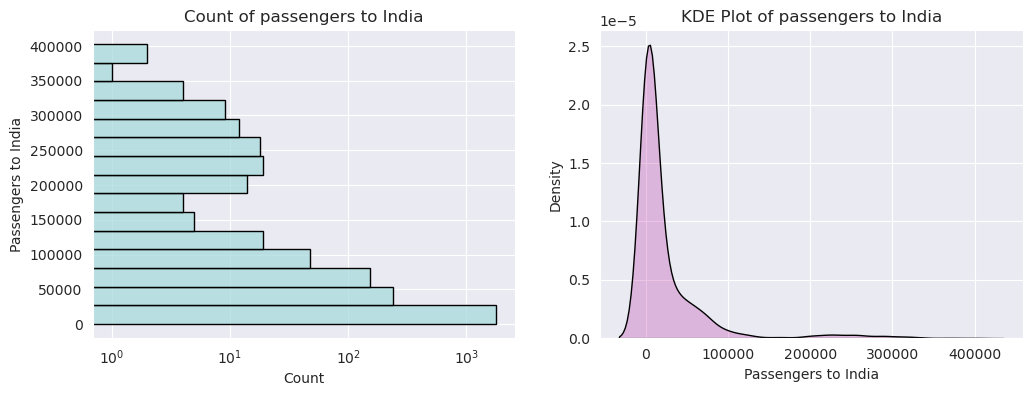

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0] = sns.histplot(data=df, y='passengers_to_india',ax=ax[0], bins=15, color='#a8dadc', edgecolor='black')
ax[0].set_xscale('log')
ax[0].set(title='Count of passengers to India', ylabel='Passengers to India')

ax[1] = sns.kdeplot(data=df, x='passengers_to_india', ax=ax[1], fill=True, color='#b5179e', edgecolor='black')
ax[1].set(title='KDE Plot of passengers to India', xlabel='Passengers to India')
plt.show()

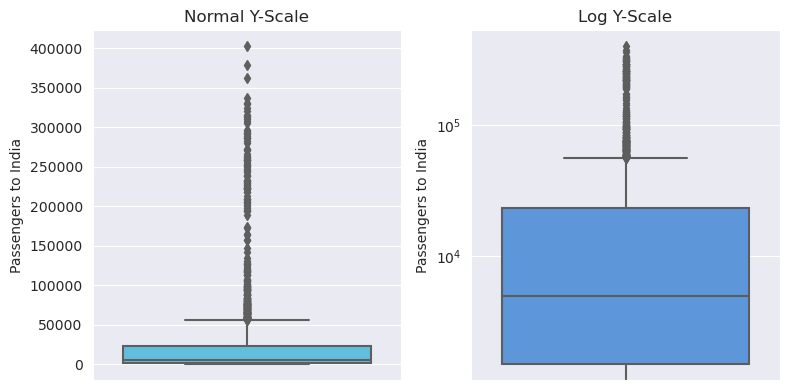

In [13]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0] = sns.boxplot(data=df, y='passengers_to_india', color='#4cc9f0', ax=ax[0])
ax[0].set(title = 'Normal Y-Scale',ylabel='Passengers to India')

ax[1] = sns.boxplot(data=df, y='passengers_to_india', color='#4895ef', ax=ax[1])
ax[1].set(title = 'Log Y-Scale',ylabel='Passengers to India')
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()

#### Exploring the outliers

In [14]:
df[df['passengers_to_india'] > 75000].groupby('year')['passengers_to_india'].sum().reset_index().style.background_gradient(cmap='summer_r', subset=['passengers_to_india'])

,year,passengers_to_india
0,2015,12306907
1,2016,14444000
2,2017,3839411


In [15]:
df[df['passengers_to_india'] > 75000].groupby(['airline_name'])['passengers_to_india'].sum().sort_values(ascending=False).reset_index().style.background_gradient(cmap='summer_r')

,airline_name,passengers_to_india
0,JET AIRWAYS,8320544
1,AIR INDIA,6417414
2,EMIRATES AIRLINE,5981862
3,AIR INDIA EXPRESS,3099689
4,ETIHAD AIRLINES,2518529
5,QATAR AIRWAYS,1579535
6,AIR ARABIA,854629
7,INDIGO,690225
8,OMAN AIR,559199
9,QATAR AIRWATYS,416025


In [16]:
df[df['passengers_to_india'] > 75000].groupby(['year','quarter'])['passengers_to_india'].sum().sort_values(ascending=False).unstack().style.background_gradient(cmap='summer_r', axis=1)


quarter,Q1,Q2,Q3,Q4
year,,,,
2015,2759176.000000,3012133.000000,3036692.000000,3498906.000000
2016,3306662.000000,3497944.000000,3574331.000000,4065063.000000
2017,3839411.000000,nan,nan,nan


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>

- No null values 
- There is a huge difference in the max value and the mean value 
- There are lots of outliers according to the box plot
- We see an increase in people coming to India every year 
- We can see a gradual increase of people coming to India as the year ends, this could be because of the holidays and New Years 


<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on passengers from India</h2>
<br>

In [17]:
df['passengers_from_india'].describe()

count      2334.000000
mean      25452.484576
std       52474.422940
min           0.000000
25%        1629.250000
50%        5264.500000
75%       23418.500000
max      400155.000000
Name: passengers_from_india, dtype: float64

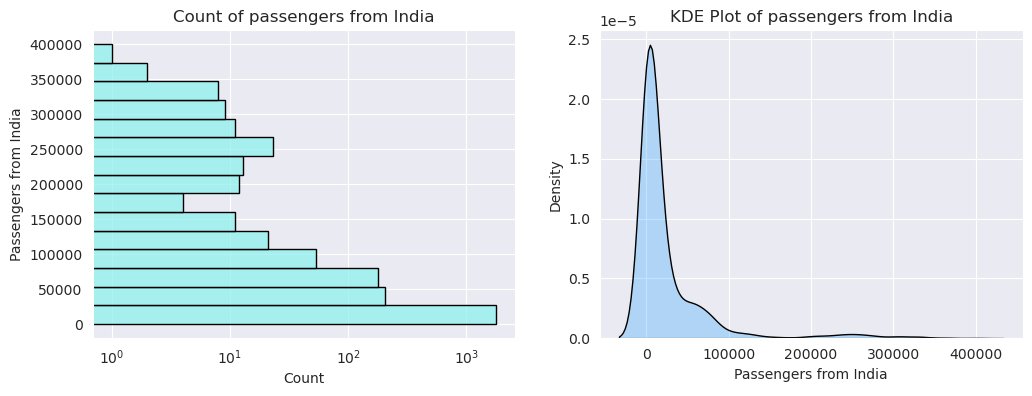

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0] = sns.histplot(data=df, y='passengers_from_india',ax=ax[0], bins=15, color='#90f1ef', edgecolor='black')
ax[0].set_xscale('log')
ax[0].set(title='Count of passengers from India', ylabel='Passengers from India')

ax[1] = sns.kdeplot(data=df, x='passengers_from_india', ax=ax[1], fill=True, color='#0496ff', edgecolor='black')
ax[1].set(title='KDE Plot of passengers from India', xlabel='Passengers from India')
plt.show()

In [19]:
df['passengers_from_india'].skew()

3.695734635952661

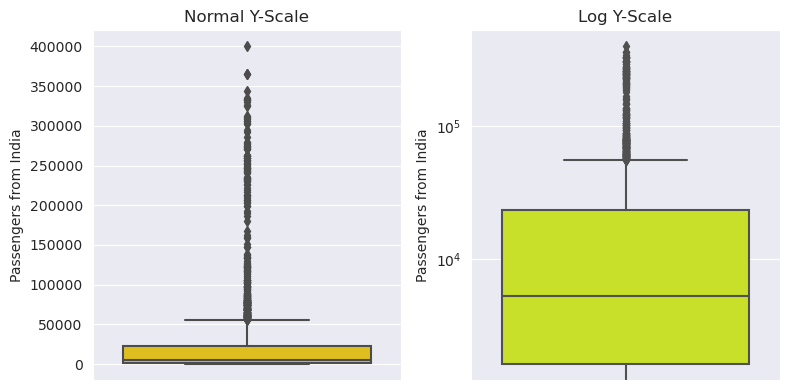

In [20]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0] = sns.boxplot(data=df, y='passengers_from_india', color='#ffd300', ax=ax[0])
ax[0].set(title = 'Normal Y-Scale',ylabel='Passengers from India')

ax[1] = sns.boxplot(data=df, y='passengers_from_india', color='#deff0a', ax=ax[1])
ax[1].set(title = 'Log Y-Scale',ylabel='Passengers from India')
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()

#### Exploring the outliers

In [21]:
df[df['passengers_from_india'] > 75000].groupby('year')['passengers_to_india'].sum().reset_index().style.background_gradient(cmap='summer_r', subset=['passengers_to_india'])

,year,passengers_to_india
0,2015,12708222
1,2016,14782136
2,2017,4121591


In [22]:
df[df['passengers_from_india'] > 75000].groupby(['airline_name'])['passengers_to_india'].sum().sort_values(ascending=False).reset_index().style.background_gradient(cmap='summer_r') 

,airline_name,passengers_to_india
0,JET AIRWAYS,8320544
1,AIR INDIA,6417414
2,EMIRATES AIRLINE,5981862
3,AIR INDIA EXPRESS,3099689
4,ETIHAD AIRLINES,2650684
5,QATAR AIRWAYS,1654189
6,AIR ARABIA,1156620
7,INDIGO,920354
8,OMAN AIR,557924
9,QATAR AIRWATYS,518664


In [23]:
df[df['passengers_from_india'] > 75000].groupby(['year','quarter'])['passengers_to_india'].sum().sort_values(ascending=False).unstack().style.background_gradient(cmap='summer_r', axis=1) 


quarter,Q1,Q2,Q3,Q4
year,,,,
2015,3096123.000000,2991656.000000,3048895.000000,3571548.000000
2016,3499636.000000,3683424.000000,3765694.000000,3833382.000000
2017,4121591.000000,nan,nan,nan


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- No null values
- Extremely positively skewed 
- The number of people going out of India is increasing every year
- This maybe because of better job opportunities and better standard of living 

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on freight to India</h2>
<br>


In [24]:
df['freight_to_india'].describe()

count     2334.000000
mean       550.932764
std       1281.898272
min          0.000000
25%          0.300000
50%         53.950000
75%        311.214750
max      14916.471000
Name: freight_to_india, dtype: float64

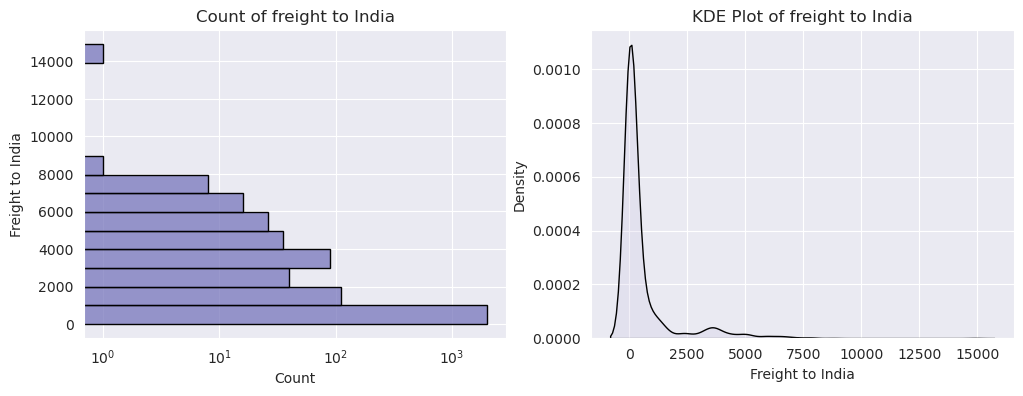

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0] = sns.histplot(data=df, y='freight_to_india',ax=ax[0], bins=15, color='#7776bc', edgecolor='black')
ax[0].set_xscale('log')
ax[0].set(title='Count of freight to India', ylabel='Freight to India')

ax[1] = sns.kdeplot(data=df, x='freight_to_india', ax=ax[1], fill=True, color='#cdc7e5', edgecolor='black')
ax[1].set(title='KDE Plot of freight to India', xlabel='Freight to India')
plt.show()

In [26]:
df['freight_to_india'].skew()

3.4873840885082505

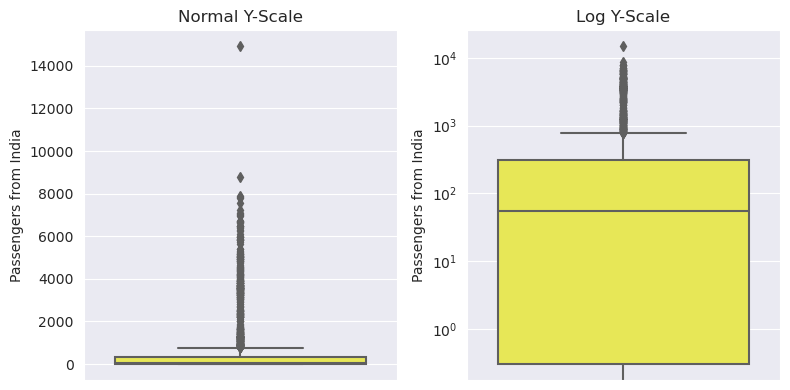

In [27]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0] = sns.boxplot(data=df, y='freight_to_india', color='#ffff3f', ax=ax[0])
ax[0].set(title = 'Normal Y-Scale',ylabel='Passengers from India')

ax[1] = sns.boxplot(data=df, y='freight_to_india', color='#ffff3f', ax=ax[1])
ax[1].set(title = 'Log Y-Scale',ylabel='Passengers from India')
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()

#### Exporing the outliers 

In [28]:
df[df['freight_to_india'] > 5000].groupby('year')['freight_to_india'].sum().reset_index().style.background_gradient(cmap='summer_r',subset=['freight_to_india']) 

,year,freight_to_india
0,2015,130005.593000
1,2016,133129.300000
2,2017,58185.500000


In [29]:
df[df['freight_to_india'] > 5000].groupby('airline_name')['freight_to_india'].sum().sort_values(ascending=False).reset_index().style.background_gradient(cmap='summer_r') 

,airline_name,freight_to_india
0,CATHAY PACIFIC,163839.269000
1,EMIRATES AIRLINE,90136.330000
2,QATAR AIRWAYS,34101.094000
3,JET AIRWAYS,28147.600000
4,AIR INDIA,5096.100000


In [30]:
df[df['freight_to_india'] > 5000].groupby(['year','quarter'])['freight_to_india'].sum().sort_values(ascending=False).unstack().style.background_gradient(cmap='summer_r') 

quarter,Q1,Q2,Q3,Q4
year,,,,
2015,17397.120000,39239.542000,39373.148000,33995.783000
2016,18422.900000,35600.800000,31703.400000,47402.200000
2017,58185.500000,nan,nan,nan


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- The amount of freight increases with year 
- Freight to India for Q1 in the year 2015 & 2016 were the same (almost) but there is a sudden increase in the Q1 in the year 2017


<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on freight from India</h2>
<br>

In [31]:
df['freight_from_india'].describe()

count     2334.000000
mean       865.262860
std       2151.224952
min          0.000000
25%          8.525000
50%        154.325000
75%        770.028000
max      48640.298000
Name: freight_from_india, dtype: float64

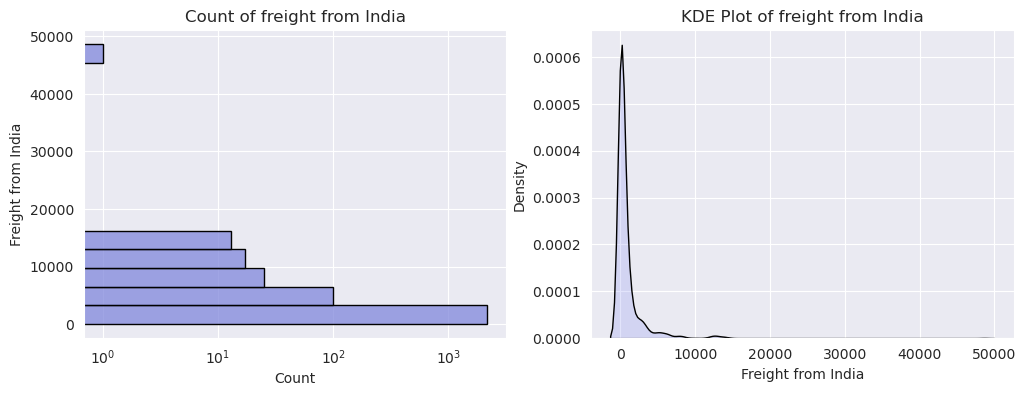

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0] = sns.histplot(data=df, y='freight_from_india',ax=ax[0], bins=15, color='#8187dc', edgecolor='black')
ax[0].set_xscale('log')
ax[0].set(title='Count of freight from India', ylabel='Freight from India')

ax[1] = sns.kdeplot(data=df, x='freight_from_india', ax=ax[1], fill=True, color='#8e94f2', edgecolor='black')
ax[1].set(title='KDE Plot of freight from India', xlabel='Freight from India')
plt.show()

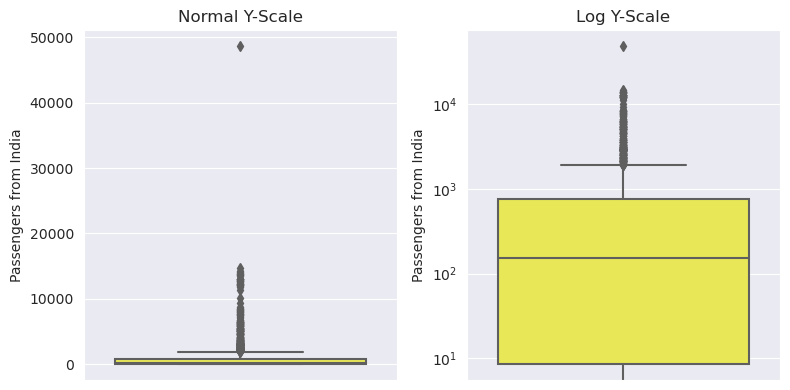

In [33]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0] = sns.boxplot(data=df, y='freight_from_india', color='#ffff3f', ax=ax[0])
ax[0].set(title = 'Normal Y-Scale',ylabel='Passengers from India')

ax[1] = sns.boxplot(data=df, y='freight_from_india', color='#ffff3f', ax=ax[1])
ax[1].set(title = 'Log Y-Scale',ylabel='Passengers from India')
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()

#### Exporing the outliers

In [34]:
df[df['freight_to_india'] > 5000].groupby('year')['freight_from_india'].sum().reset_index().style.background_gradient(cmap='summer_r',subset=['freight_from_india']) 

,year,freight_from_india
0,2015,168572.922000
1,2016,169919.100000
2,2017,80773.900000


In [35]:
df[df['freight_to_india'] > 5000].groupby('airline_name')['freight_from_india'].sum().sort_values(ascending=False).reset_index().style.background_gradient(cmap='summer_r') 

,airline_name,freight_from_india
0,EMIRATES AIRLINE,213488.525000
1,CATHAY PACIFIC,102127.753000
2,QATAR AIRWAYS,56812.344000
3,JET AIRWAYS,39488.500000
4,AIR INDIA,7348.800000


In [36]:
df[df['freight_to_india'] > 5000].groupby(['year','quarter'])['freight_from_india'].sum().sort_values(ascending=False).unstack().style.background_gradient(cmap='summer_r') 

quarter,Q1,Q2,Q3,Q4
year,,,,
2015,39592.499000,52814.665000,37629.449000,38536.309000
2016,22941.600000,54397.100000,32603.100000,59977.300000
2017,80773.900000,nan,nan,nan


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
- No null values
- Highly positively skewed data
- The freight from India increases every year 

# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Univariate Analysis on Categorical Variables</h1></span><a class='anchor' id='EDA_Cat'></a>
<br>

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on most common months and most common quarters</h2>
<br>

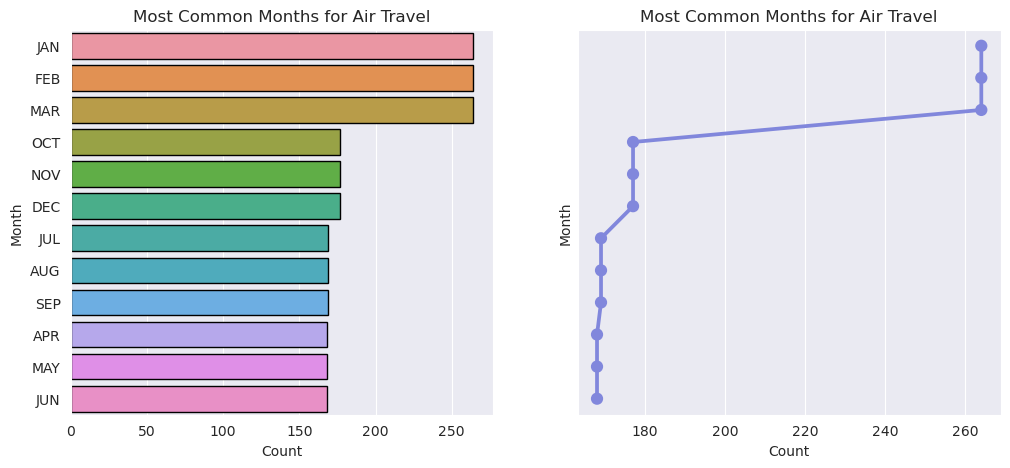

In [37]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

ax[0] = sns.barplot(data=df, y = df['month'].value_counts().reset_index()['index'],  x = df['month'].value_counts().reset_index()['month'], ax=ax[0],
                    linewidth=1, edgecolor='black')
ax[0].set(title='Most Common Months for Air Travel', xlabel='Count', ylabel='Month')

ax[1] = sns.pointplot(data=df, y = df['month'].value_counts().reset_index()['index'],  x = df['month'].value_counts().reset_index()['month'], ax=ax[1],
                     color = '#8187dc')
ax[1].set(title='Most Common Months for Air Travel', xlabel='Count', ylabel='Month')

plt.show()

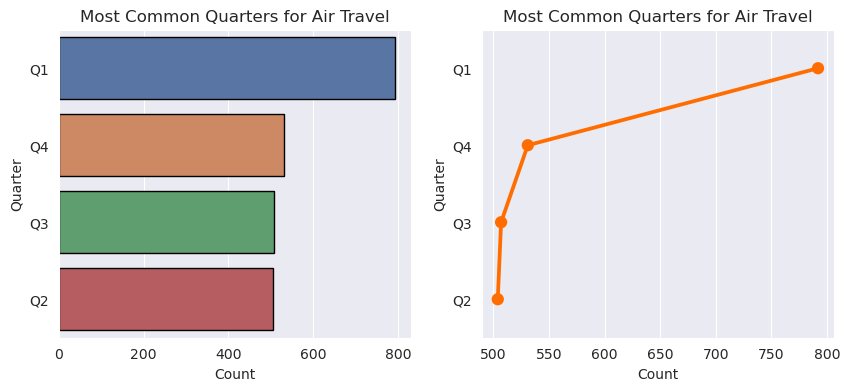

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0] = sns.barplot(data=df, y = df['quarter'].value_counts().reset_index()['index'],  x = df['quarter'].value_counts().reset_index()['quarter'], ax=ax[0],
                    edgecolor='black', palette='deep')
ax[0].set(title='Most Common Quarters for Air Travel', xlabel='Count', ylabel='Quarter')

ax[1] = sns.pointplot(data=df, y = df['quarter'].value_counts().reset_index()['index'],  x = df['quarter'].value_counts().reset_index()['quarter'], ax=ax[1],
                     color = '#ff6d00')
ax[1].set(title='Most Common Quarters for Air Travel', xlabel='Count', ylabel='Quarter')

plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
- The most common months for travel and freight transportation are Jan,Feb and March
- The most common quarter for travel and freight transportation is Q1 
- This could be because in our data, we have only Q1 of 2017 data, so that kind of adds some bias 
- Well, this could also be because air travel and transportation are high during the beginning of the year 

# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Bivariate Analysis </h1></span><a class='anchor' id='BVA'></a>
<br>
<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
    
Bivariate analysis is the examination of the relationship between two variables. Here are three key points about bivariate analysis:
- Relationship Exploration: Bivariate analysis helps uncover patterns, associations, or connections between two variables. It allows us to understand how changes in one variable correspond to changes in another variable.

- Correlation Assessment: Bivariate analysis helps us assess the strength and direction of the relationship between two variables. It enables us to determine if the variables are positively, negatively, or not correlated at all.

- Visual Representation: Bivariate analysis often involves the use of visualizations such as scatter plots, line graphs, or heatmaps. These visual representations provide a clear and concise way to understand the relationship between the two variable

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on passengers to India and passengers from India</h2>
<br>

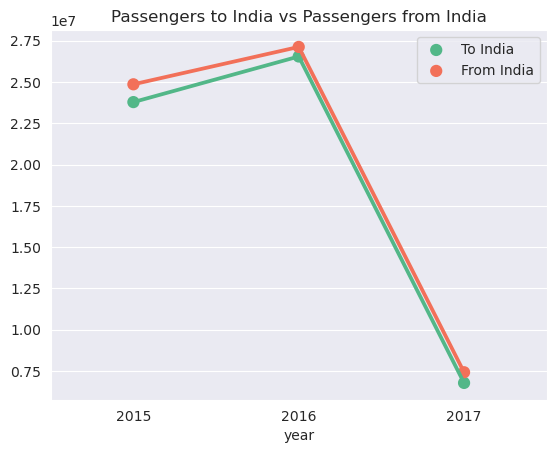

In [39]:
sns.pointplot(data=df, y=df.groupby('year')['passengers_to_india'].sum().values, x=df.groupby('year')['passengers_to_india'].sum().index,
             color='#52b788', label='To India')
sns.pointplot(data=df, y=df.groupby('year')['passengers_from_india'].sum().values, x=df.groupby('year')['passengers_from_india'].sum().index,
             color='#f27059', label='From India')
plt.title('Passengers to India vs Passengers from India')
plt.legend()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- In 2015, the number of people going out of India was much more than the number of people coming back to India 
- This has greatly reduced in the following two years, maybe because less job opportunities for people outside India


<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on freight to India and freight from India
</h2>
<br>

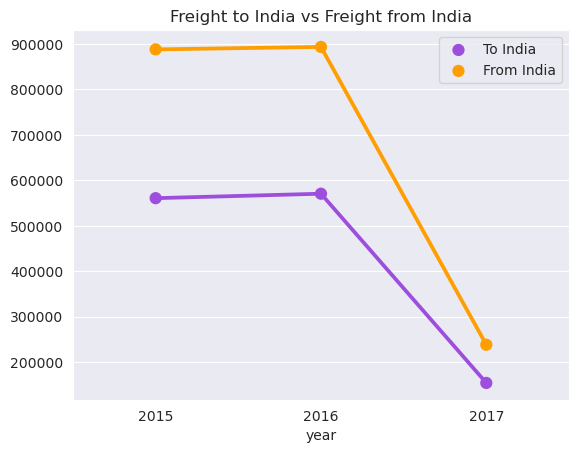

In [40]:
sns.pointplot(data=df, y=df.groupby('year')['freight_to_india'].sum().values, x=df.groupby('year')['freight_to_india'].sum().index,
             color='#9d4edd', label='To India')
sns.pointplot(data=df, y=df.groupby('year')['freight_from_india'].sum().values, x=df.groupby('year')['freight_from_india'].sum().index,
             color='#ff9e00', label='From India')
plt.title('Freight to India vs Freight from India')
plt.legend()
plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- The freight exported in 2015 was much more than that imported, this maybe because more people were going out of India in 2015 than coming to India
- This remained more or less constant in the year 2016 too, but in 2016, the number of people coming back to India was almost the same as number of people going abroad. So, my best guess is that, this data also includes the other raw materials exported from India, and more exports were made when compared to imports 
- In 2017 however both these graphs have a steep negative slope, well that maybe because ww just have Q1 data of 2017

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on passengers to India and passengers from India with month</h2>
<br>

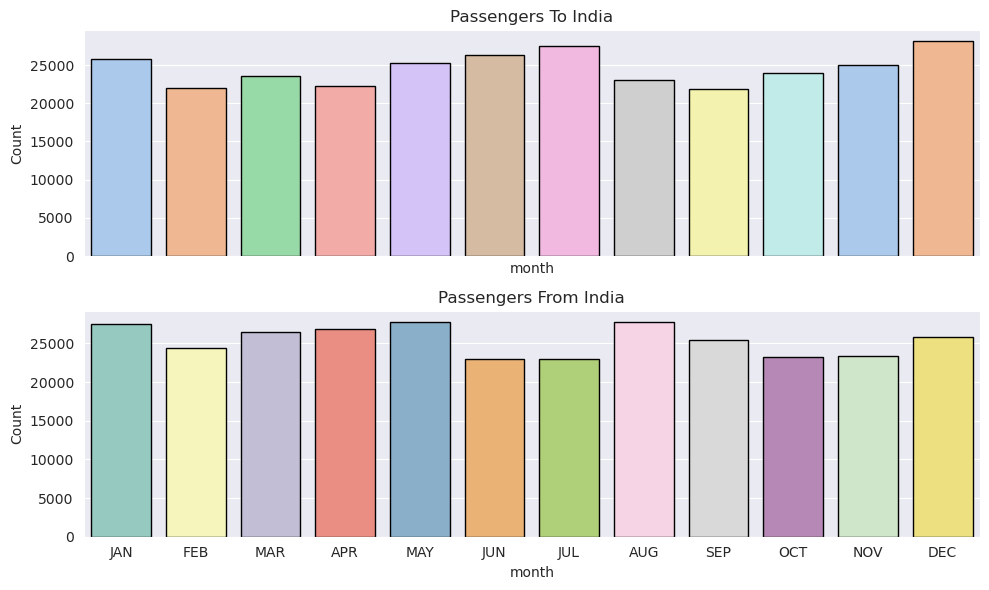

In [41]:
fig, ax = plt.subplots(2,1,figsize=(10,6), sharex=True)

ax[0] = sns.barplot(data=df, x='month', y='passengers_to_india' , ax=ax[0], errorbar=None, linewidth=1, edgecolor='black', palette='pastel')
ax[0].set(title='Passengers To India', ylabel='Count')

ax[1] = sns.barplot(data=df, x='month', y='passengers_from_india', ax=ax[1], errorbar=None, linewidth=1, edgecolor='black', palette='Set3')
ax[1].set(title='Passengers From India', ylabel='Count')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- December attracts the highest influx of visitors to India, possibly due to the anticipation of celebrating Christmas and New Year's Eve with their loved ones.
- The largest number of people from India tend to travel in the months of January (following the celebration of New Year's Eve), May (after the summer break), and August (as many overseas colleges commence their semesters around August-September). 
- Apart from those specific months, the inflow and outflow of people entering and leaving India remain relatively balanced.

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on passengers to India and passengers from India with quarter</h2>
<br>

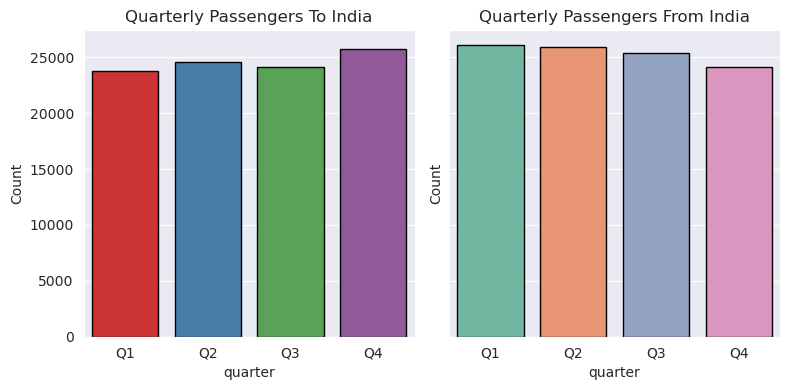

In [42]:
fig, ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

ax[0] = sns.barplot(data=df, x='quarter', y='passengers_to_india' , ax=ax[0], errorbar=None, linewidth=1, edgecolor='black', palette='Set1')
ax[0].set(title='Quarterly Passengers To India', ylabel='Count')

ax[1] = sns.barplot(data=df, x='quarter', y='passengers_from_india', ax=ax[1], errorbar=None, linewidth=1, edgecolor='black', palette='Set2')
ax[1].set(title='Quarterly Passengers From India', ylabel='Count')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- The highest number of people depart from India in the first quarter, with a gradual decrease in the subsequent quarters.
- Conversely, the largest number of people return to India in the fourth quarter, possibly to celebrate New Year's Eve and various festivals.

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on freight to India and freight from India with quarter</h2>
<br

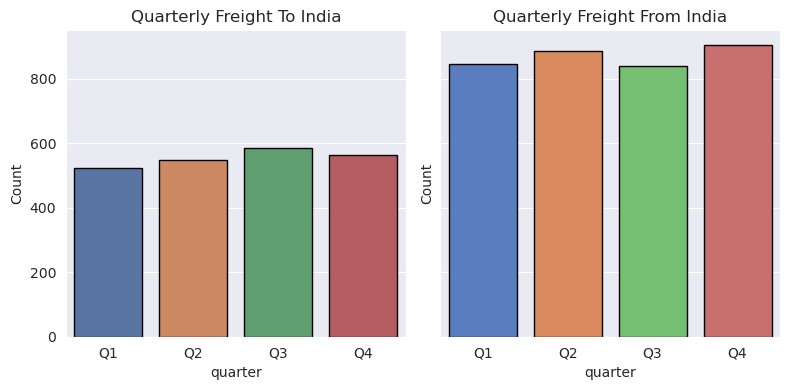

In [43]:
fig, ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

ax[0] = sns.barplot(data=df, x='quarter', y='freight_to_india' , ax=ax[0], errorbar=None, linewidth=1, edgecolor='black', palette='deep')
ax[0].set(title='Quarterly Freight To India', ylabel='Count')

ax[1] = sns.barplot(data=df, x='quarter', y='freight_from_india', ax=ax[1], errorbar=None, linewidth=1, edgecolor='black', palette='muted')
ax[1].set(title='Quarterly Freight From India', ylabel='Count')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- Throughout all quarters, the export volume exceeds the import volume.
- The fourth quarter exhibits the highest export volume.


<div style="border-radius:10px; border:#2ec4b6 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>End of EDA</font></h3>
    Thank you so much for going through my notebook! If you have any suggestions, please feel free to put them in the comments